# 1.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

%matplotlib inline

# 2.0 EDA

## 2.1 Reading Data

In [468]:
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"

df = pd.read_csv(url, error_bad_lines = False)

df.drop( labels = 'row.names', axis = 1, inplace = True )

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## 2.2 Missing Data

In [469]:
# no missing values

print ( df.isnull().sum() )

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


## 2.3 Data Types

In [470]:
# only one categorical column which is famhist

df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

## 2.4 Helper Functions

### 2.4.1 Get Data

In [471]:
def get_dataset(shuffle, seed):
    
    url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"

    df = pd.read_csv(url, error_bad_lines = False)

    df.drop( labels = 'row.names', axis = 1, inplace = True )
    
    data_types = df.dtypes
    
    values = df.values
    
    if shuffle == True:

        print("shuffling\n")

        np.random.seed(seed)

        np.random.shuffle(values)
        
        df = pd.DataFrame(data = values, columns=df.columns)
        
        df = df.astype(data_types)

        return df

    else:

        return df

### 2.4.2 Splitting the Data

In [472]:
def split_data(data, train_ratio, test_ratio):
    
    train_length = int ( len(data) * train_ratio )
        
    test_length = int ( len(data) * test_ratio )
    
    x_train = data.iloc[:train_length,:-1] 
    y_train = data.iloc[:train_length,-1:]
    x_test = data.iloc[train_length:train_length+test_length,:-1]
    y_test = data.iloc[train_length:train_length+test_length,-1:]
    
    return x_train, y_train, x_test, y_test 

### 2.4.3 Data Standardization

In [473]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(data):
        
    scaler = MinMaxScaler()
    
    columns = data.columns
    
    categorical = data.iloc[:,4:6]
    
    numerical = np.concatenate( ( data.iloc[:,:4], data.iloc[:,6:] ), axis=1 )
    
    numerical = scaler.fit_transform(numerical)
    
    return pd.DataFrame ( data = np.concatenate( ( numerical[:,:4], categorical ,numerical[:,4:] ), axis=1 ), columns = columns)

### 2.4.4 One Hot Encoder

In [474]:
def one_hot_encoder (df):
    
    df_temp = df.copy()

    df_temp = pd.get_dummies(df_temp)
    
    df_temp = df_temp[[ 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist_Absent', 'famhist_Present', 'typea', 'obesity',
           'alcohol', 'age', 'chd']]
    
    return df_temp

### 2.4.5 Graph Plotter

In [475]:
def graph_plotter (x , y, x_label, y_label, plot_type = "actual", color_by= None):
    
    plt.figure(figsize = (10,6))
    
    colors = []
    
    for c in color_by:
        
        if c == 0:
            
            colors.append("tab:blue")
            
        elif c == 1:
            
            colors.append("tab:red")
                
    if plot_type == "actual":
        
        plt.scatter(x, y, s=5, c = colors)
        plt.title(f"{x_label} vs {y_label} actual", fontsize = 18)
        plt.xlabel ( f"{x_label}", fontsize= 15 )
        plt.ylabel( f"{y_label}", fontsize = 15 )
    
    elif plot_type == "predicted":
        
        plt.scatter(x, y, s=5, c = colors)
        plt.title(f"{x_label} vs {y_label} predicted", fontsize = 18)
        plt.xlabel ( f"{x_label}", fontsize= 15 )
        plt.ylabel( f"{y_label}", fontsize = 15 )
            
    plt.show()

### 2.4.6 Preprocess Data

In [476]:
def preprocess_data(shuffle, seed, train_ratio, test_ratio, is_pca):
    
    df = get_dataset(shuffle = shuffle, seed = seed)

    df = one_hot_encoder(df)

    x_train, y_train, x_test, y_test = split_data(df, train_ratio, test_ratio)
    
    x_train = scale_data(x_train)

    x_test = scale_data(x_test)
        
    if is_pca == True:

        x_train, x_test = pca( x_train, x_test )
        
        x_train, x_test = pd.DataFrame( x_train ), pd.DataFrame( x_test )

    return x_train, y_train, x_test, y_test

# 3.0 ML Algorithms

## 3.1 K-means

In [477]:
from sklearn.cluster import KMeans

def kmeans(x_train):
    
    kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)
        
    return kmeans

## 3.2 Nerual Network

In [478]:
import tensorflow as tf

def nerual_network(x_train, y_train, epochs = 35, batch_size = 12):
    
    ann = tf.keras.models.Sequential()

    ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=128, activation='sigmoid'))
    ann.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy')

    ann.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, shuffle = False)
                  
    return ann

## 3.3 Logistic Regression

In [479]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(x_train, y_train):
    
    log = LogisticRegression()

    log.fit(x_train, y_train)

    return log

## 3.4 PCA

In [480]:
from sklearn.decomposition import PCA

def pca(x_train, x_test):

    pca = PCA(0.9, random_state=0)

    pca.fit( x_train )

    print ( f"Explained variation by PCA 1: {pca.explained_variance_ratio_[0]}" )
    
    print ( f"Explained variation by PCA 2: {pca.explained_variance_ratio_[1]}" )

    x_train = pca.transform(x_train)

    x_test = pca.transform(x_test)

    return x_train, x_test 

## 3.5 Run Models

In [491]:
from sklearn.metrics import accuracy_score

def run_models(shuffle, train_ratio, test_ratio, is_pca, model):
    
    x_train, y_train, x_test, y_test = preprocess_data(shuffle = shuffle, seed = 481999, train_ratio=train_ratio, test_ratio=test_ratio, is_pca = is_pca)
    
    if model == "kmeans":
        
        kmeans_model = kmeans(x_train)

        y_predicted = kmeans_model.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_predicted)
        
        print(f"\nAccuracy of the model {model} is: {accuracy}\n")
                
        if is_pca == True:
        
            graph_plotter(x = x_test.iloc[:,1], y = x_test.iloc[:,0], x_label="PCA 2", y_label="PCA 1", plot_type="actual", color_by = y_test.values )

            graph_plotter(x = x_test.iloc[:,1], y = x_test.iloc[:,0], x_label="PCA 2", y_label="PCA 1", plot_type="predicted", color_by = y_predicted )
        
        elif is_pca == False:
        
            graph_plotter(x = x_test.iloc[:,1], y = x_test.iloc[:,0], x_label="tobacco", y_label="sbp", plot_type="actual", color_by = y_test.values )

            graph_plotter(x = x_test.iloc[:,1], y = x_test.iloc[:,0], x_label="tobacco", y_label="sbp", plot_type="predicted", color_by = y_predicted )
                
    elif model == "neural network":
        
        neural_network_model = nerual_network( x_train, y_train )

        softmax = neural_network_model.predict(x_test, batch_size = 12)

        y_predicted= []

        for x in softmax:

            y_predicted.append( x.argmax())

        y_predicted = np.array(y_predicted)
        
        accuracy = accuracy_score(y_test, y_predicted)
        
        accuracy = accuracy_score(y_test, y_predicted)
        
        print(f"\nAccuracy of the model {model} is: {accuracy}\n")
        
        if is_pca == True:
        
            graph_plotter(x = x_test.iloc[:,1], y = x_test.iloc[:,0], x_label="PCA 2", y_label="PCA 1", plot_type="actual", color_by = y_test.values )

            graph_plotter(x = x_test.iloc[:,1], y = x_test.iloc[:,0], x_label="PCA 2", y_label="PCA 1", plot_type="predicted", color_by = y_predicted )
        
        elif is_pca == False:
        
            graph_plotter(x = x_test.iloc[:,1], y = x_test.iloc[:,0], x_label="tobacco", y_label="sbp", plot_type="actual", color_by = y_test.values )

            graph_plotter(x = x_test.iloc[:,1], y = x_test.iloc[:,0], x_label="tobacco", y_label="sbp", plot_type="predicted", color_by = y_predicted )
        
    elif model == "logistic regression":
        
        log = logistic_regression(x_train, y_train)
        
        y_predicted = log.predict (x_test)
        
        accuracy = accuracy_score(y_test, y_predicted)
        
        print(f"\nAccuracy of the model {model} is: {accuracy}\n")
               

# 4.0 Results

## 4.1 Part A

### 4.1.1 K Means

shuffling

Accuracy of the model kmeans is: 0.341991341991342


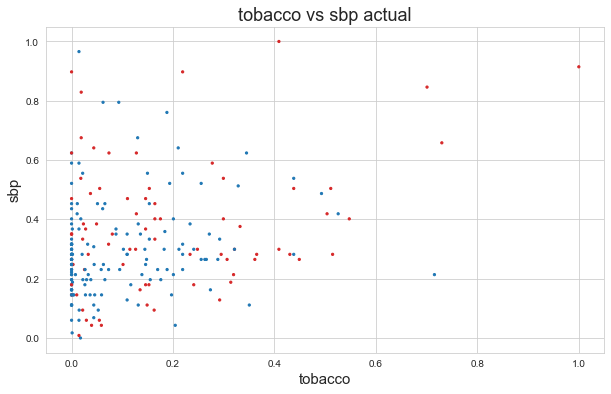

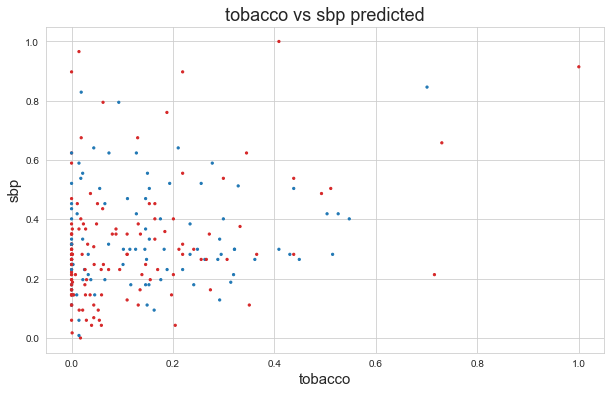

In [484]:
run_models(shuffle= True, train_ratio= 0.5, test_ratio= 0.5, is_pca= False, model= "kmeans")

### 4.1.2 Neural Network

shuffling

Epoch 1/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6961
Epoch 2/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6934
Epoch 3/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 4/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 5/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 6/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 7/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 8/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 9/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 10/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 11/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 12/35
20/20 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 13/35
20/20 [===================

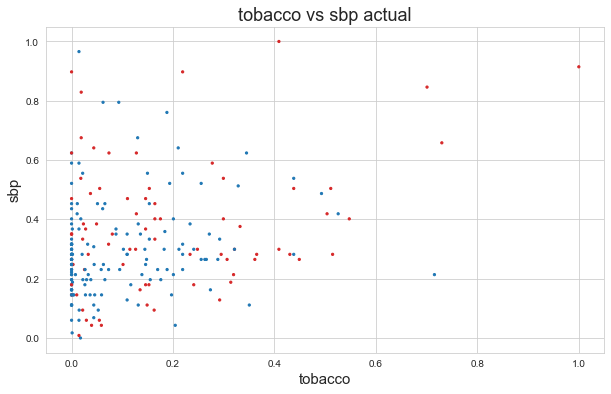

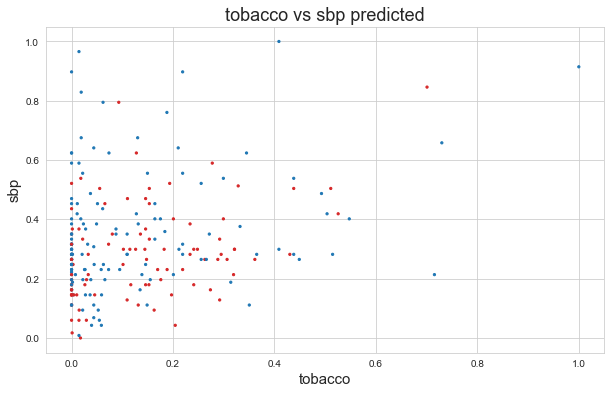

In [486]:
run_models(shuffle= True, train_ratio= 0.5, test_ratio= 0.5, is_pca= False, model= "neural network")

### 4.1.3 BONUS Logistic Regression

In [489]:
run_models(shuffle= True, train_ratio= 0.5, test_ratio= 0.5, is_pca= False, model= "logistic regression")

shuffling

Accuracy of the model logistic regression is: 0.7575757575757576


D:\Program Files\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## 4.2 Part B

### 4.2.1 K Means

shuffling

Explained variation by PCA 1: 0.6511020848900572
Explained variation by PCA 2: 0.14412048365228375
Accuracy of the model kmeans is: 0.341991341991342


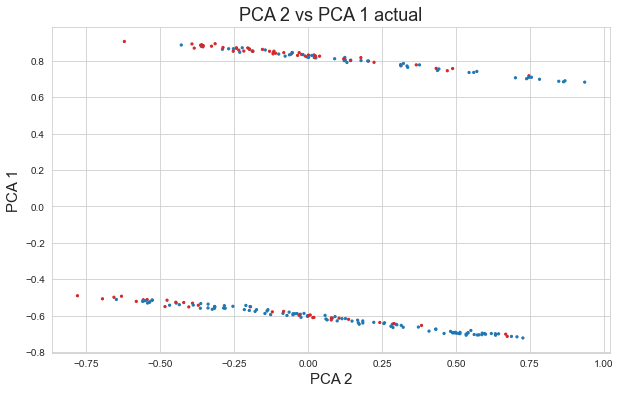

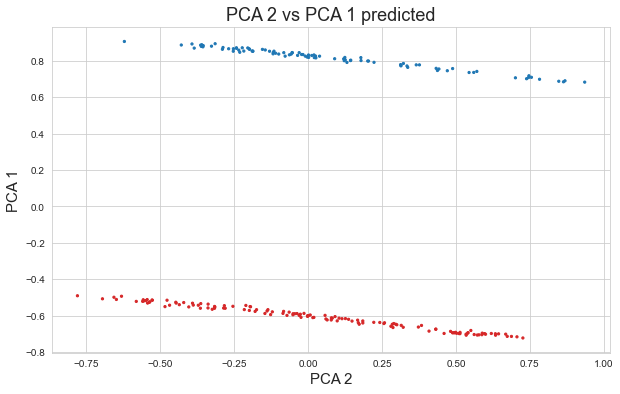

In [490]:
run_models(shuffle= True, train_ratio= 0.5, test_ratio= 0.5, is_pca= True, model= "kmeans")

### 4.2.2 Neural Network

shuffling

Explained variation by PCA 1: 0.6511020848900572
Explained variation by PCA 2: 0.14412048365228375
Epoch 1/35
20/20 [==============================] - 0s 1ms/step - loss: 0.7759
Epoch 2/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6973
Epoch 3/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6936
Epoch 4/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6933
Epoch 5/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 6/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 7/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 8/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 9/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 10/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 11/35
20/20 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 12/35
20/20 [

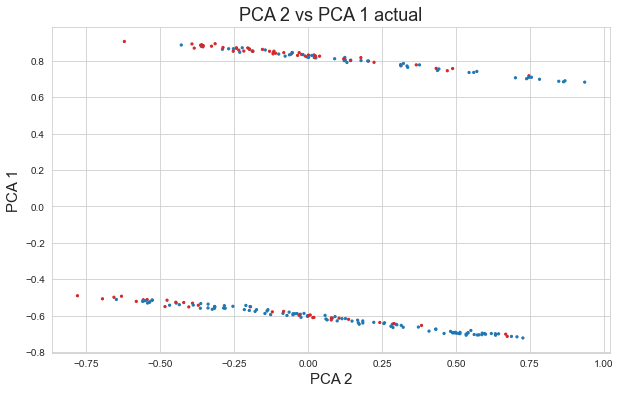

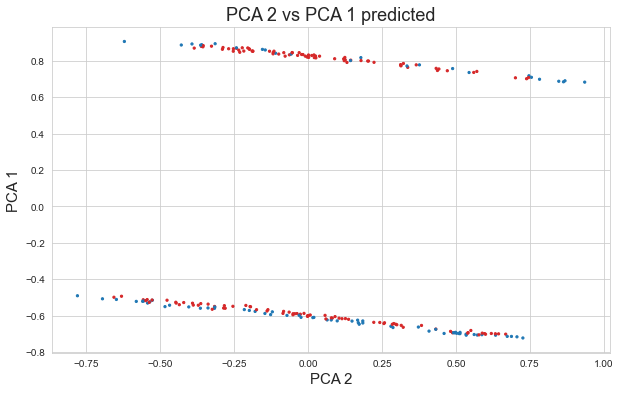

In [492]:
run_models(shuffle= True, train_ratio= 0.5, test_ratio= 0.5, is_pca= True, model= "neural network")

### 4.2.3 BONUS Logistic Regression

In [493]:
run_models(shuffle= True, train_ratio= 0.5, test_ratio= 0.5, is_pca= True, model= "logistic regression")

shuffling

Explained variation by PCA 1: 0.6511020848900572
Explained variation by PCA 2: 0.14412048365228375

Accuracy of the model logistic regression is: 0.7359307359307359



D:\Program Files\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
